# Problem Statement / Business Case

Here we will be working on the data collected from a bank in New York City. That data is all about the customers for the past 6-months. The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into atleast 3 distinctive groups.

In simple terms we will be performing customer segmetation / unsupervised learning

## Workflow

### Data Sourcing 

#### Import libraries and Dataset

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Data Loading

In [3]:
# loading the csv file
creditcard_df = pd.read_csv('D:\\github\\1-DataSets\\DatScience For Business\\Marketing_data.csv')

In [4]:
# looking at the top five rows of the data frame
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# looking at the bottom five rows of the data
creditcard_df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
# looking at the shape of the data frame
creditcard_df.shape

(8950, 18)

In [7]:
# information about the data frame - shape, size, data types
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# summary statistics of the data frame
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#### Getting the customers feel
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Visualize and Explore Dataset

#### Missing Values

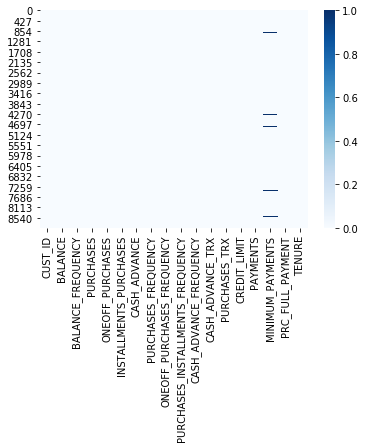

In [11]:
sns.heatmap(creditcard_df.isnull(),
           cmap='Blues')

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Filling the missing values

In [13]:
creditcard_df.loc[creditcard_df.MINIMUM_PAYMENTS.isnull()==True,'MINIMUM_PAYMENTS'] =creditcard_df.MINIMUM_PAYMENTS.mean() 

In [14]:
creditcard_df.loc[creditcard_df.CREDIT_LIMIT.isnull()==True,'CREDIT_LIMIT'] =creditcard_df.CREDIT_LIMIT.mean() 

#### Duplicate entries

In [15]:
creditcard_df.duplicated().sum()

0

In [16]:
#### Dropping columns
creditcard_df.drop('CUST_ID',
                  axis=1,
                  inplace=True)

#### PLotting

In [24]:
#plt.figure(figsize=(10,50))
#for i in range(len(creditcard_df.columns)):
#    plt.subplot(17,1,i+1)
#    sns.distplot(creditcard_df[creditcard_df.columns[i]],
#                kde_kws={'color':'b','lw':3, 'label':'KDE'},
#                hist_kws={'color':'r'})
#    plt.title(creditcard_df.columns[i])
#plt.tight_layout()

### Modelling

#### Finding the optinal number of clusters (K-Means)

In [25]:
# Scaling
scaler = StandardScaler()
creditcard_df_scaled =  scaler.fit_transform(creditcard_df)

In [26]:
creditcard_df_scaled.shape

(8950, 17)

In [27]:
wcss_scores = []
k_values = range(1,20)

for i in k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_scores.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

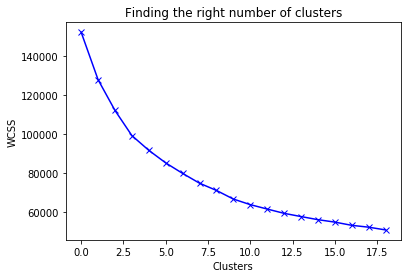

In [29]:
plt.plot(wcss_scores,'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

#### Applying k-means method

In [30]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [31]:
labels.shape

(8950,)

In [45]:
labels

array([0, 4, 7, ..., 1, 1, 1])

In [33]:
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'clusters':labels})],axis=1)

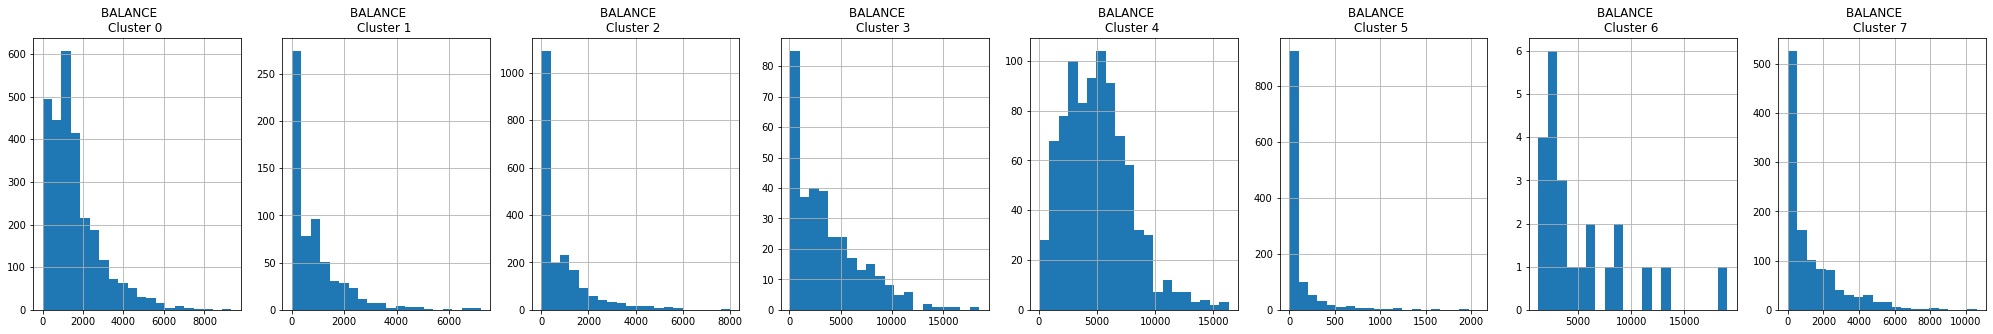

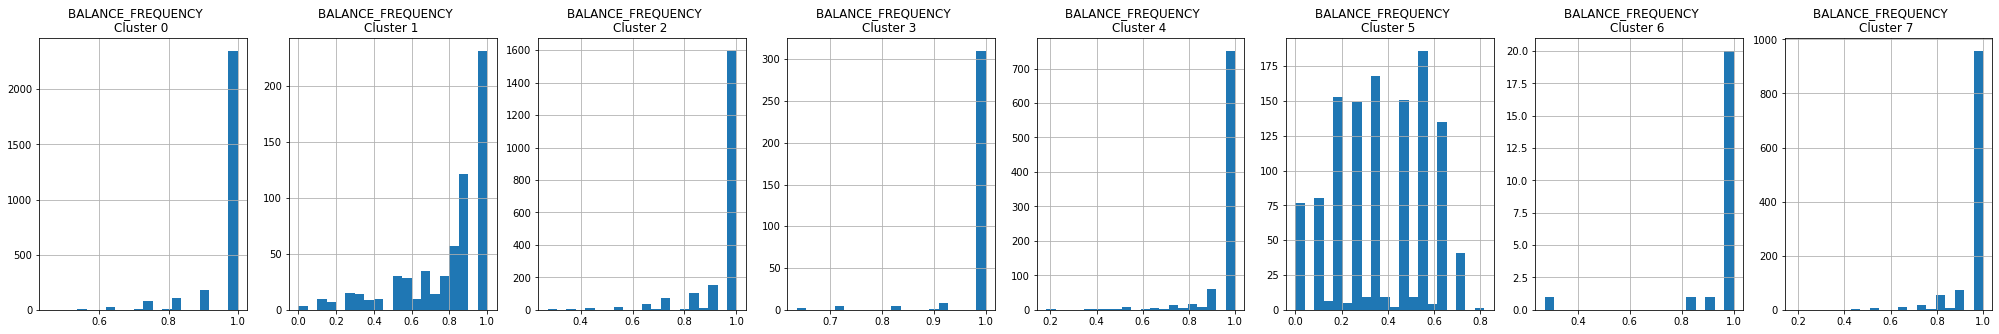

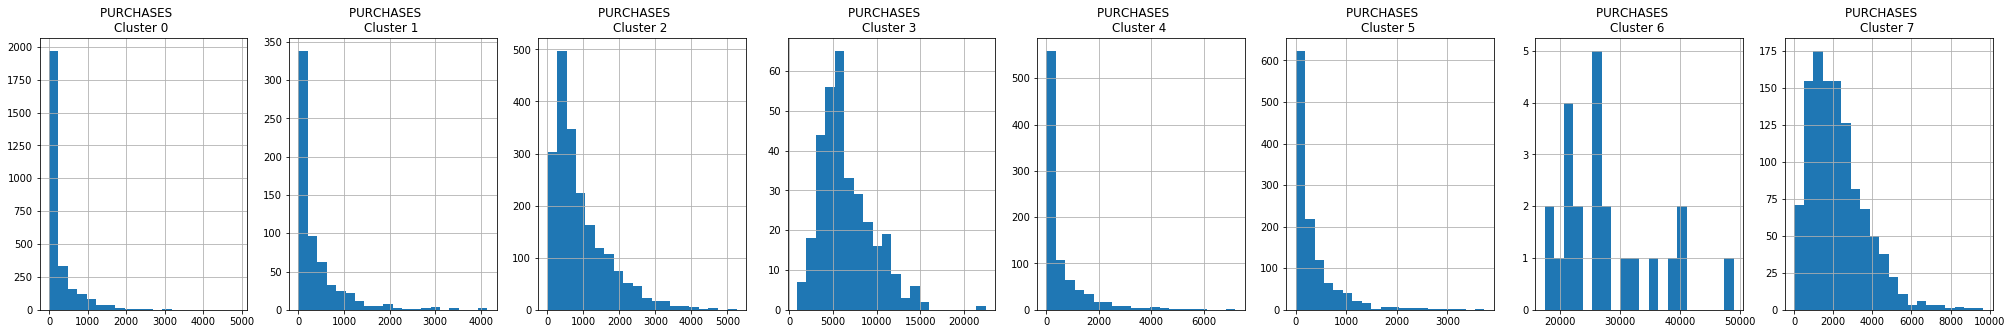

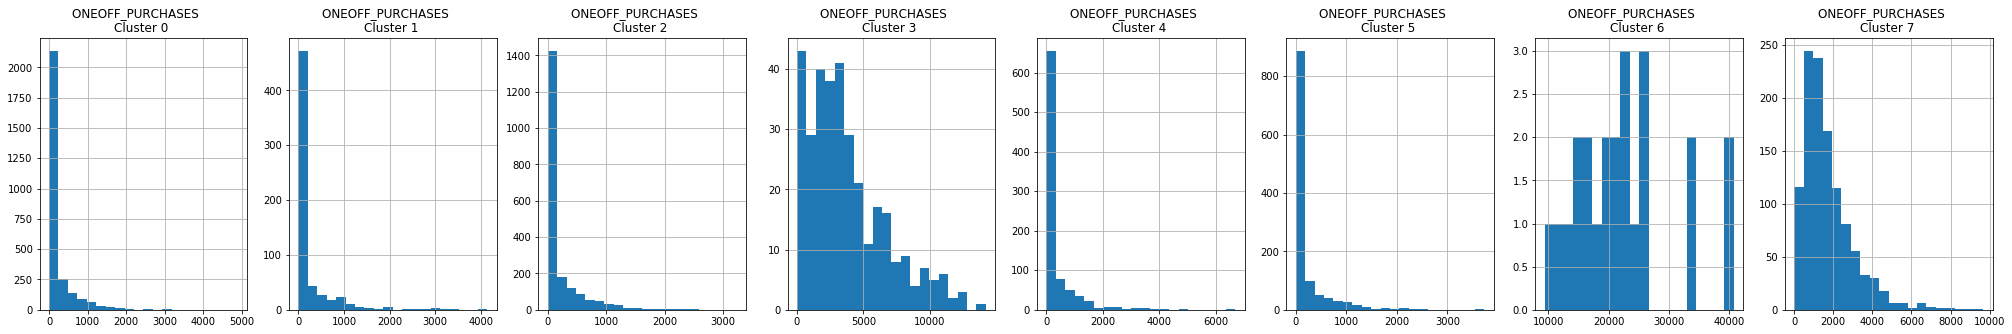

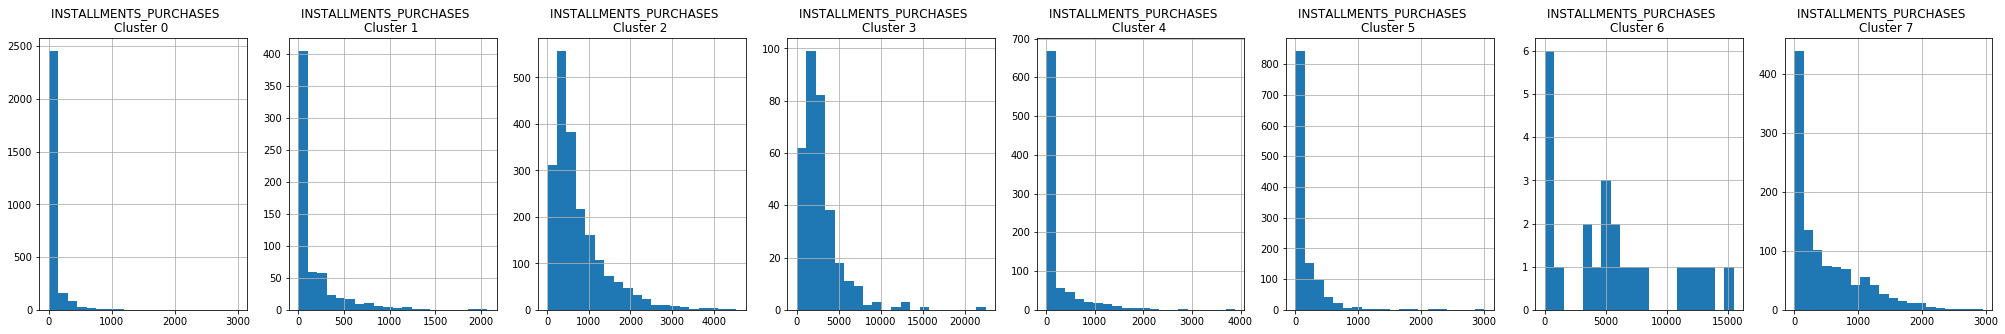

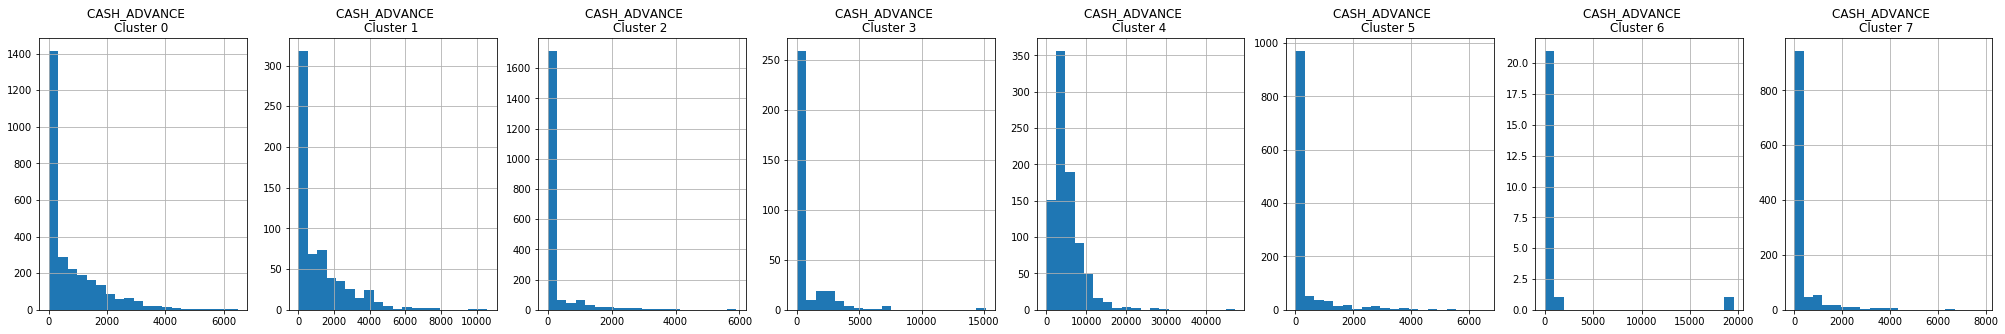

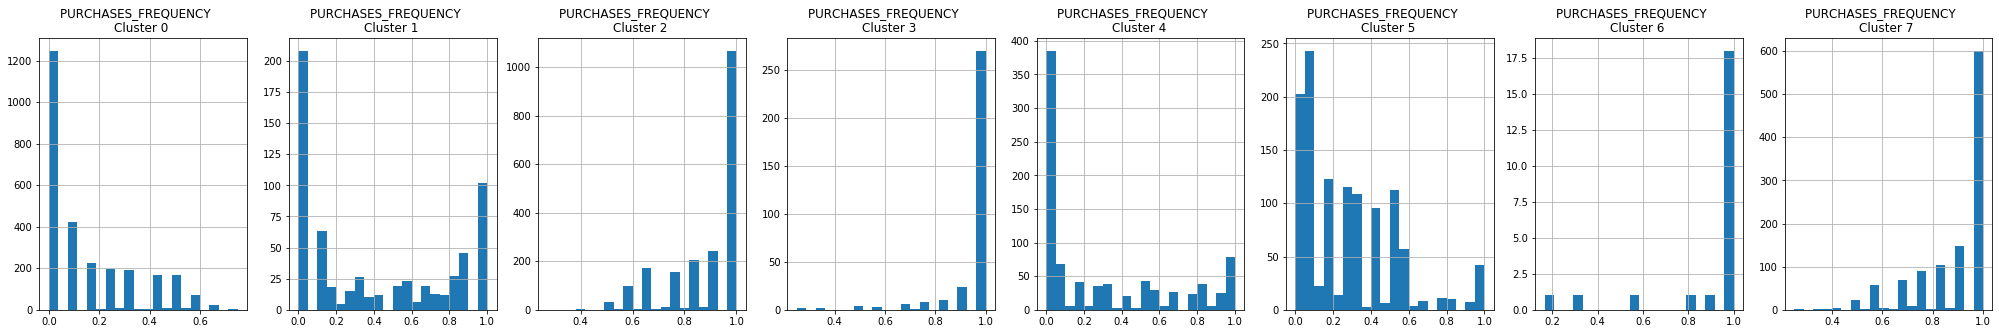

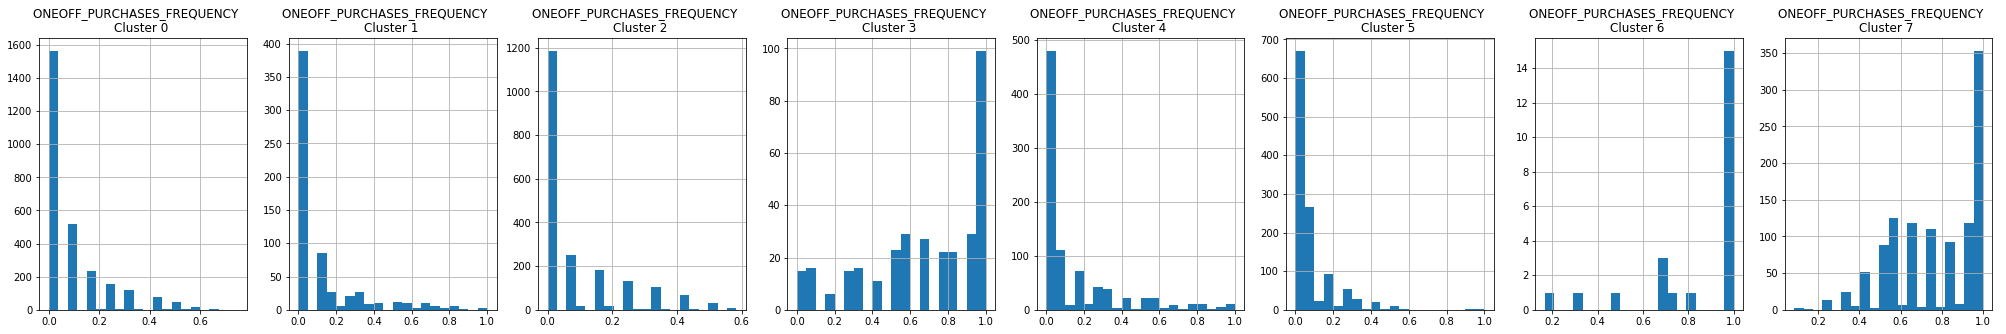

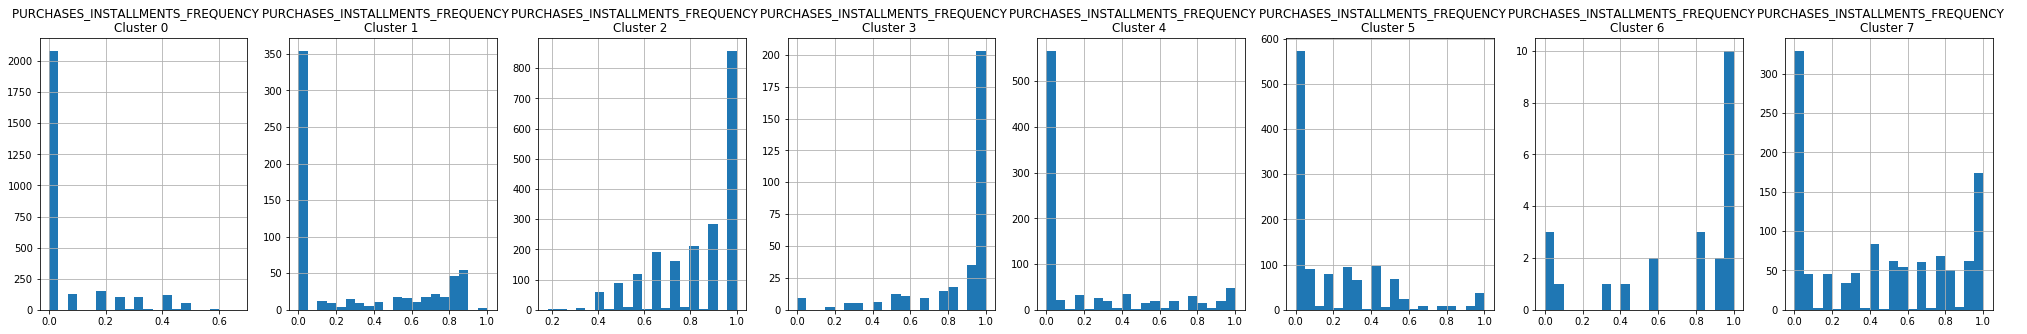

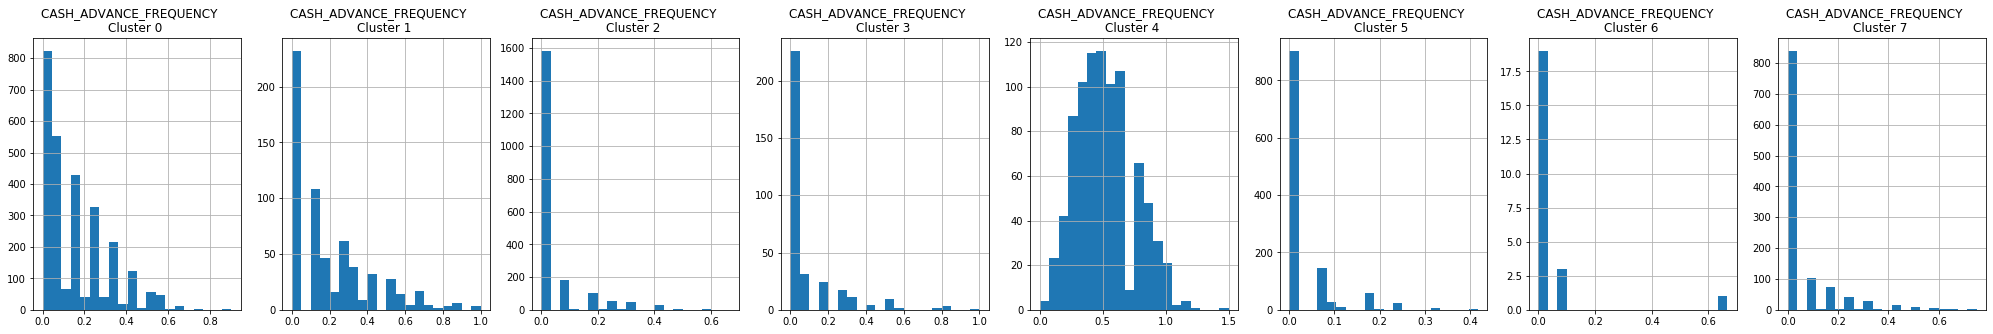

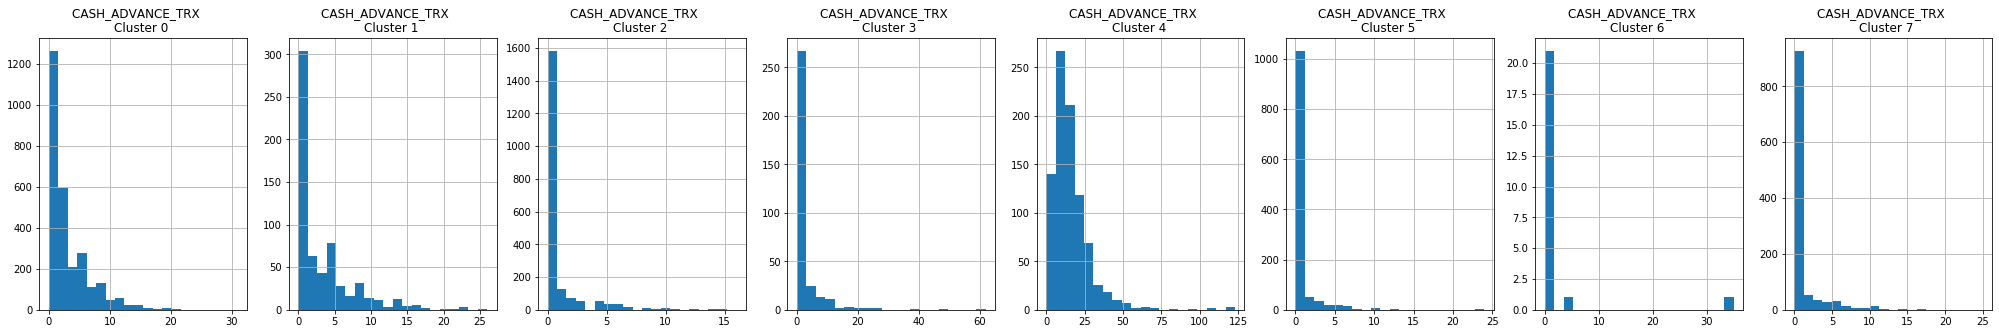

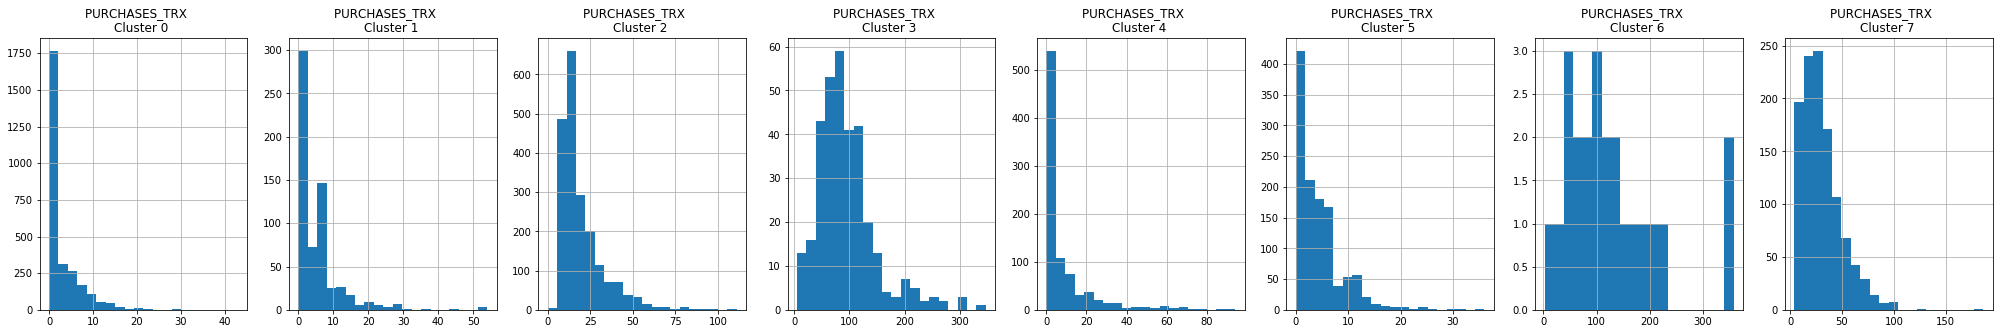

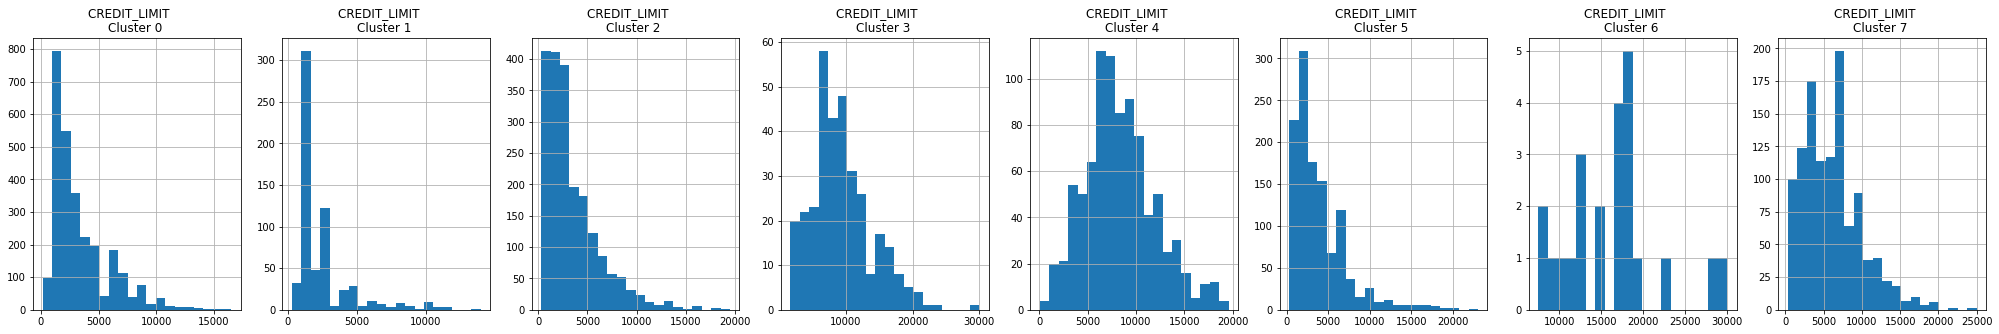

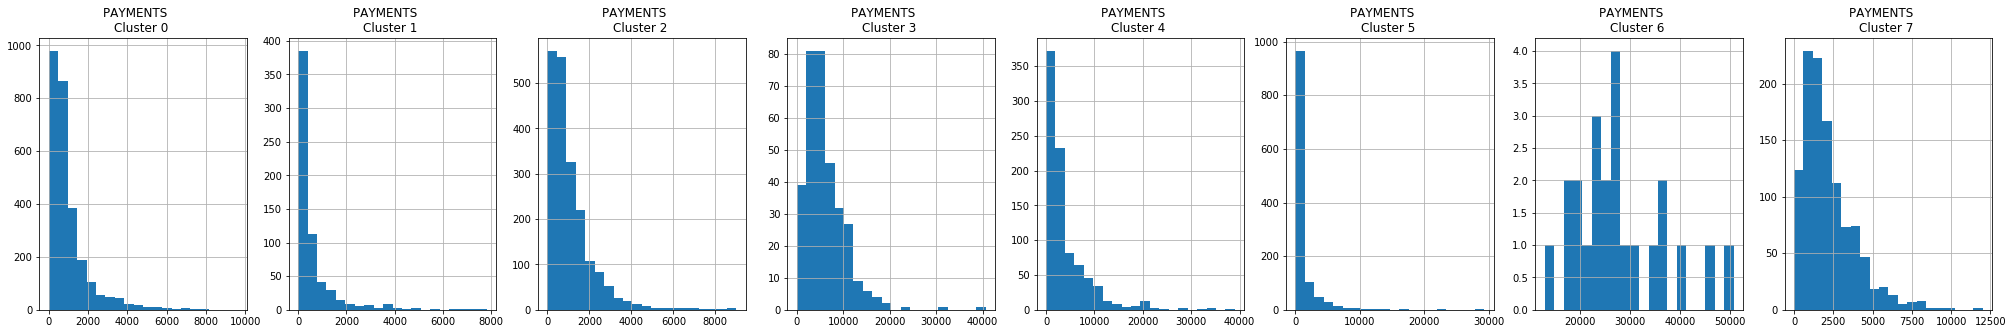

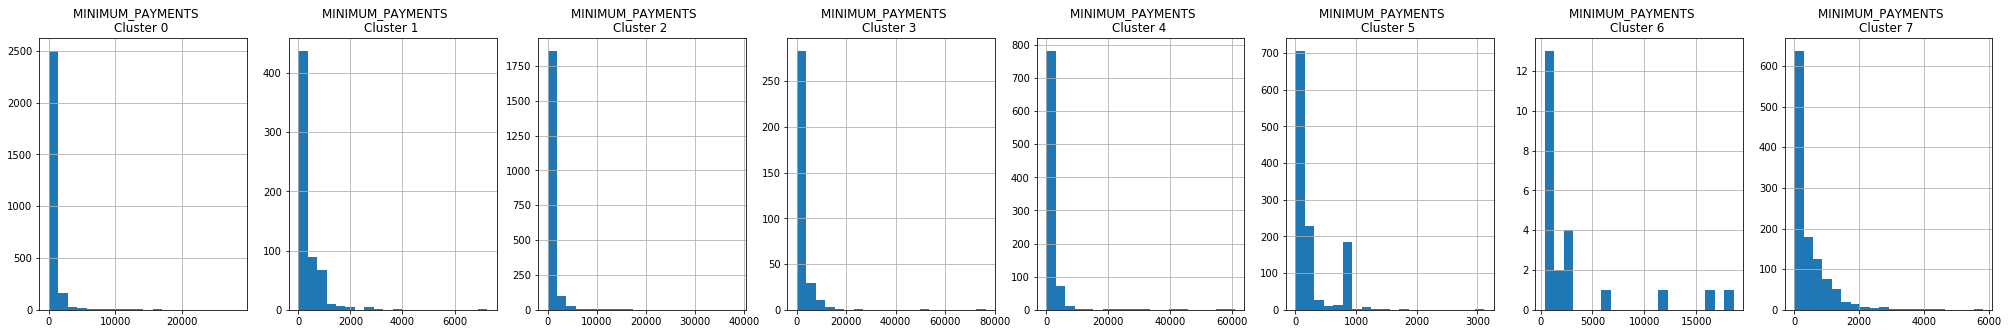

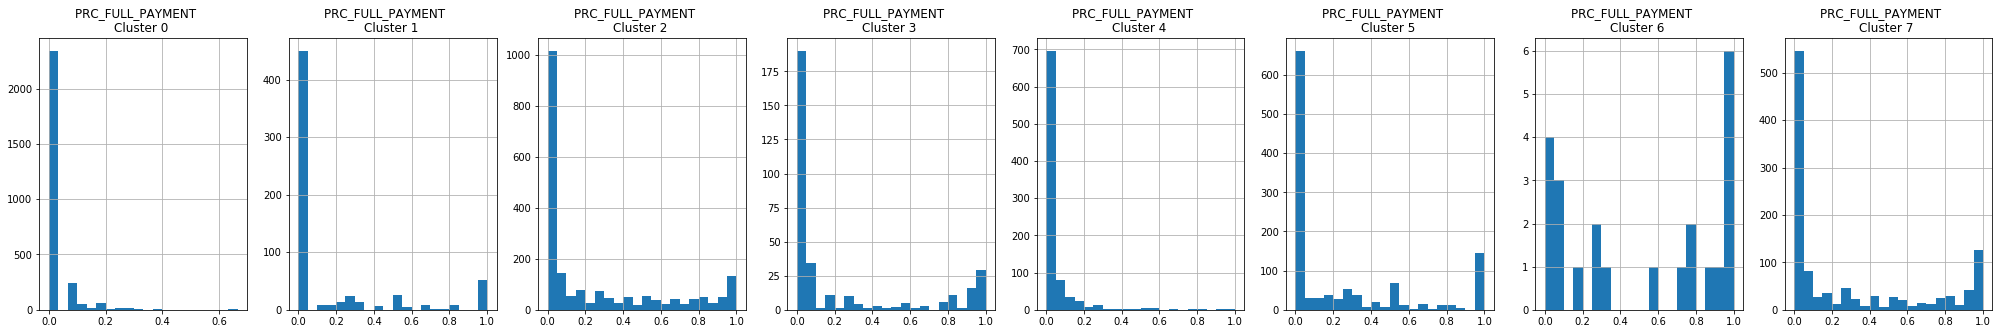

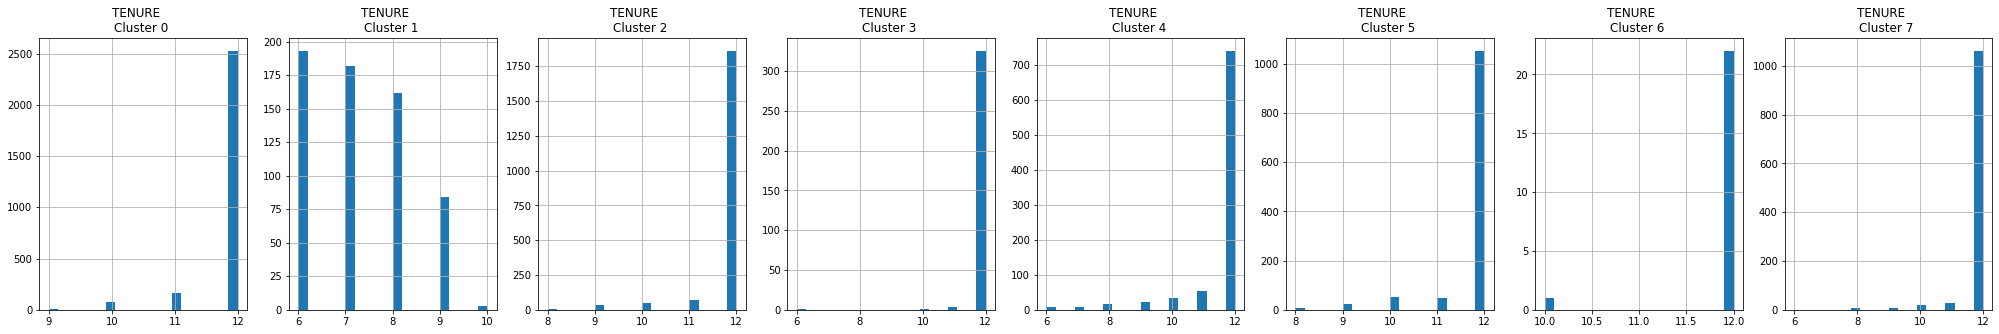

In [35]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['clusters'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

#### PCA

In [36]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)

In [37]:
principal_comp

array([[-1.68222246, -1.07644526],
       [-1.13830387,  2.50646537],
       [ 0.96969145, -0.38356241],
       ...,
       [-0.92620365, -1.8107651 ],
       [-2.33655375, -0.65793049],
       [-0.55641914, -0.40047249]])

In [39]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])

In [40]:
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076445
1,-1.138304,2.506465
2,0.969691,-0.383562
3,-0.873630,0.043156
4,-1.599435,-0.688570


In [47]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],
                  axis=1)

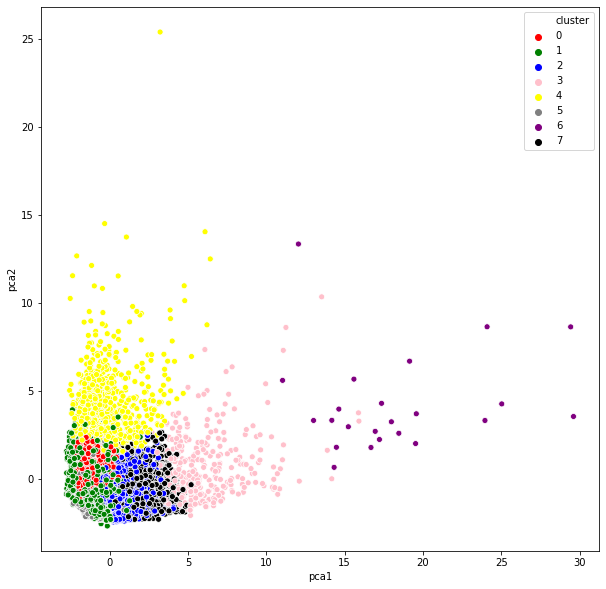

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette =['red','green','blue','pink','yellow','gray','purple', 'black'])